In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import PIL
from PIL import Image
from keras.utils.np_utils import to_categorical
from keras.models import Sequential,Model 
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D,Input,BatchNormalization 
from keras.optimizers import RMSprop,Adam

Using TensorFlow backend.


In [9]:
train = pd.read_csv('aithon2020_level2_traning.csv')

In [10]:
train.shape

(10817, 2305)

In [11]:
Y_train = train['emotion'][:10000]
Y_val = train['emotion'][10000:]
Y_train = Y_train.to_numpy()
Y_val = Y_val.to_numpy()

In [12]:
dd = train.drop('emotion',axis = 1)
X_train = dd[:10000]
X_val = dd[10000:]

In [13]:
X_train = X_train.to_numpy()
X_val = X_val.to_numpy()

In [14]:
X_train = X_train.reshape([10000,48,48])
X_val = X_val.reshape([817,48,48])
X_train = X_train/255
X_val = X_val/255


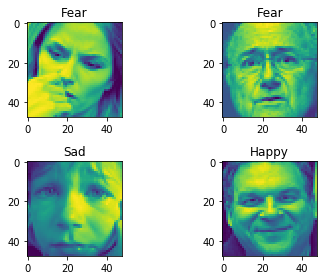

In [16]:
fig = plt.figure()
for i in range(4):
    fig.add_subplot(2,2,i+1)
    plt.imshow(X_train[i])
    plt.title(Y_train[i])
fig.tight_layout()
plt.show()

In [15]:
Y_train_num = []
for i in range(10000):
    if(Y_train[i] == 'Happy'):
        Y_train_num.append(0)
    elif (Y_train[i] == 'Sad'):
        Y_train_num.append(1)
    else:
        Y_train_num.append(2)
Y_onehot_train = to_categorical(Y_train_num,num_classes=3)      

In [16]:
Y_val_num = []
for i in range(817):
    if(Y_val[i] == 'Happy'):
        Y_val_num.append(0)
    elif (Y_val[i] == 'Sad'):
        Y_val_num.append(1)
    else:
        Y_val_num.append(2)
Y_onehot_val = to_categorical(Y_val_num,num_classes=3)      

In [17]:
def mirror(A):
    temp = np.rot90(A)
    temp = np.rot90(temp)
    temp = temp[...,::-1,:]
    return temp

def rot180(A):
    temp = np.rot90(A)
    temp = np.rot90(temp)
    return temp
    

In [88]:
def new_Model():    
    Model = Sequential([
        Conv2D(64,(5,5),activation = 'relu',padding = 'same',input_shape=(48,48,1)),
        Conv2D(64,(5,5),activation = 'relu',padding = 'same'),
        BatchNormalization(),
        MaxPool2D(2,2),
        Conv2D(128,(5,5),activation = 'relu',padding = 'same'),
        Conv2D(128,(5,5),activation = 'relu',padding = 'same'),
        BatchNormalization(),
        MaxPool2D(2,2),
        Conv2D(256,(5,5),activation = 'relu',padding = 'same'),
        Conv2D(256,(5,5),activation = 'relu',padding = 'same'),
        BatchNormalization(),
        MaxPool2D(2,2),
        Flatten(),
        Dense(128,activation = 'relu'),
        BatchNormalization(),
        Dropout(0.2),
        Dense(3,activation = 'softmax')
    ])
    Model.compile(optimizer = 'adam', loss = "categorical_crossentropy", metrics = ["accuracy"])
    return Model
    

In [89]:
Model = new_Model()

In [90]:
Model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_25 (Conv2D)           (None, 48, 48, 64)        1664      
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 48, 48, 64)        102464    
_________________________________________________________________
batch_normalization_17 (Batc (None, 48, 48, 64)        256       
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 24, 24, 64)        0         
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 24, 24, 128)       204928    
_________________________________________________________________
conv2d_28 (Conv2D)           (None, 24, 24, 128)       409728    
_________________________________________________________________
batch_normalization_18 (Batc (None, 24, 24, 128)      

In [48]:
history2 = Model.fit(X_train, Y_onehot_train, batch_size = 100, epochs = 4,validation_data = (X_val, Y_onehot_val), verbose = 1)

Train on 10000 samples, validate on 817 samples
Epoch 1/4
10000/10000 [==============================] - 578s 58ms/step - loss: 0.0285 - accuracy: 0.9905 - val_loss: 1.0920 - val_accuracy: 0.7515
Epoch 2/4
10000/10000 [==============================] - 555s 55ms/step - loss: 0.0143 - accuracy: 0.9972 - val_loss: 0.9791 - val_accuracy: 0.7625
Epoch 3/4
10000/10000 [==============================] - 556s 56ms/step - loss: 0.0069 - accuracy: 0.9988 - val_loss: 1.0495 - val_accuracy: 0.7699
Epoch 4/4
10000/10000 [==============================] - 559s 56ms/step - loss: 0.0040 - accuracy: 0.9993 - val_loss: 1.0683 - val_accuracy: 0.7687


In [ ]:
def Plot(a,b):
    plt.plot(a,label = 'accuracy_train')
    plt.plot(c,label = 'accuracy_val')
    plt.xlabel('epochs')
    plt.ylabel('value')
    plt.title('Evaluation Metrics')
    plt.legend()
    plt.show()

In [ ]:
Plot(a,b)

In [49]:
pred = Model.predict(X_val)

In [50]:
pred.shape

(817, 3)

In [51]:
prediction = []
for i in range(817):
    value = np.argmax(pred[i])
    if(value == 0):
        prediction.append('Happy')
    elif(value == 1):
        prediction.append('Sad')
    else:
        prediction.append('Fear')

In [52]:
prediction[0:10]

['Happy',
 'Happy',
 'Sad',
 'Fear',
 'Sad',
 'Sad',
 'Fear',
 'Happy',
 'Fear',
 'Happy']

In [148]:
correct = 0
for i in range(817):
    if(prediction[i] == Y_val[i]):
        correct += 1

In [149]:
(correct/817)*100

76.86658506731946